In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("ventas_starbucks_2025 (1).csv")

df["Fecha"] = pd.to_datetime(df["Fecha"])

df.head()



,ID_Venta,Fecha,Hora,Sucursal,Nombre_Producto,Categoría_Producto,Tamaño,Cantidad,Precio_Unitario,Total_Venta,...,Método_de_Pago,Cliente_Miembro,Descuento_Miembro,Promoción_Aplicada,Empleado_Atendió,Turno,Demora_Preparación_Min,Satisfacción_Cliente,Stock_Antes,Stock_Después
0,VTA00001,2025-01-04,08:25,"San Lorenzo 25, Nueva Córdoba",Termo Reutilizable,Merchandising,NaN,2,3277.87,6555.74,...,App,Sí,15,Combo,Camila,Noche,13.7,5,23,21
1,VTA00002,2025-01-10,14:08,Córdoba Shopping,Té Verde en Hebras,Té,NaN,1,1630.18,1630.18,...,Tarjeta,Sí,10,Ninguna,Florencia,Noche,2.3,4,20,19
2,VTA00003,2025-01-17,15:10,Córdoba Shopping,Moneda de Chocolate,Snacks,NaN,4,879.24,3516.96,...,Tarjeta,No,0,Ninguna,Julián,Tarde,8.8,2,23,19
3,VTA00004,2025-03-23,07:23,Calle San Lorenzo 47,Espresso Roast,Café en Granos,NaN,5,2230.73,11153.65,...,Tarjeta,Sí,10,Ninguna,Marcos,Noche,3.9,3,19,14
4,VTA00005,2025-03-19,18:33,Córdoba Shopping,Espresso Roast,Café en Granos,NaN,5,2486.63,12433.15,...,Tarjeta,No,0,Combo,Sofía,Tarde,13.8,5,41,36


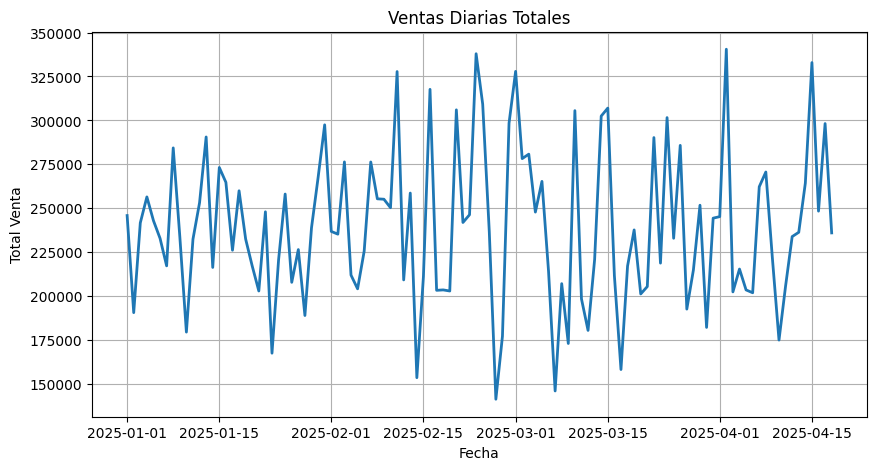

In [ ]:
ventas_diarias = df.groupby("Fecha")["Total_Venta"].sum().reset_index()

cantidad_diaria = df.groupby("Fecha")["Cantidad"].sum().reset_index()

demora_diaria = df.groupby("Fecha")["Demora_Preparación_Min"].mean().reset_index()

satisfaccion_diaria = df.groupby("Fecha")["Satisfacción_Cliente"].mean().reset_index()

ventas_sucursal = df.groupby(["Fecha", "Sucursal"])["Total_Venta"].sum().reset_index()

plt.figure(figsize=(10,5))
plt.plot(ventas_diarias["Fecha"], ventas_diarias["Total_Venta"], linestyle='-', linewidth=2)
plt.title("Ventas Diarias Totales")
plt.xlabel("Fecha")
plt.ylabel("Total Venta")
plt.grid()
plt.savefig("grafico1_ventas_diarias.png")
plt.show()

Las ventas muestran una variación marcada entre semanas. Algunos días presentan importantes, lo que puede indicar promociones o días de mayor afluencia.

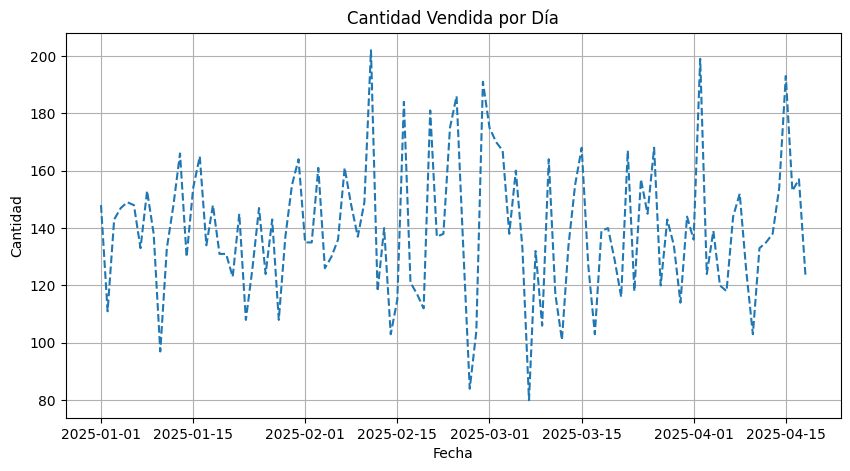

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(cantidad_diaria["Fecha"], cantidad_diaria["Cantidad"], linestyle='--')
plt.title("Cantidad Vendida por Día")
plt.xlabel("Fecha")
plt.ylabel("Cantidad")
plt.grid()
plt.savefig("grafico2_cantidad_diaria.png")
plt.show()

La demanda sigue una tendencia similar a las ventas, confirmando relación directa entre flujo de clientes y ganancias.

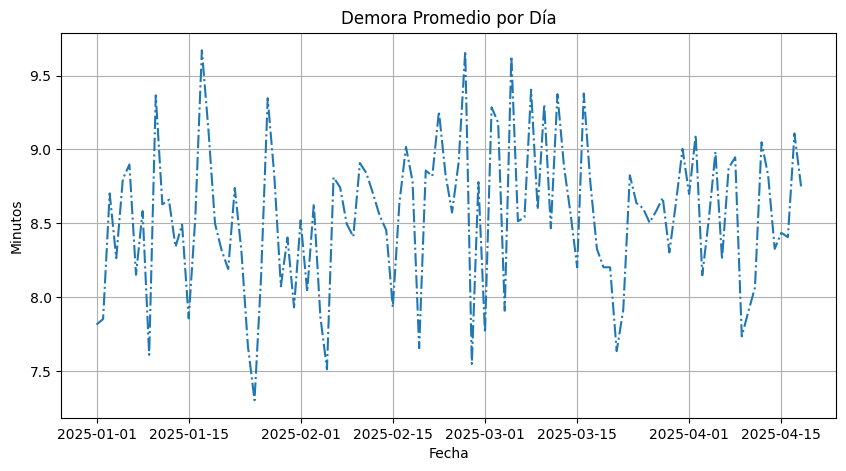

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(demora_diaria["Fecha"], demora_diaria["Demora_Preparación_Min"], linestyle='-.')
plt.title("Demora Promedio por Día")
plt.xlabel("Fecha")
plt.ylabel("Minutos")
plt.grid()
plt.savefig("grafico3_demora.png")
plt.show()


La demora promedio muestra fluctuaciones. En días con mayor venta tiende a aumentar, lo cual puede indicar saturación del personal.

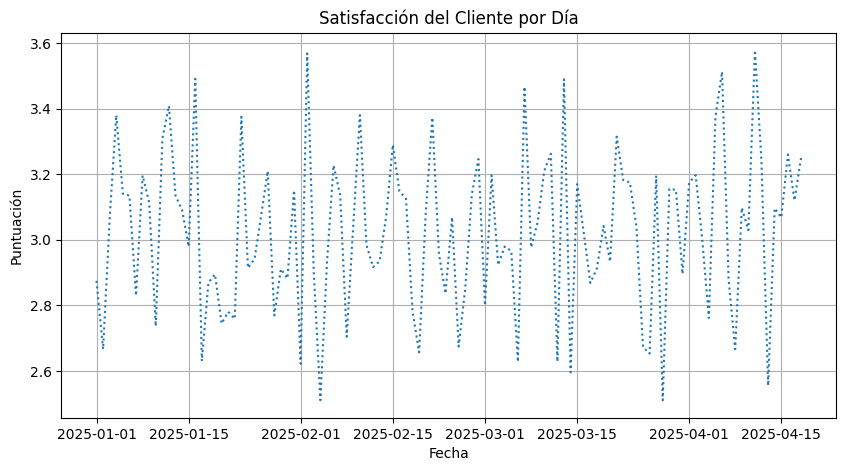

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(satisfaccion_diaria["Fecha"], satisfaccion_diaria["Satisfacción_Cliente"], linestyle=':')
plt.title("Satisfacción del Cliente por Día")
plt.xlabel("Fecha")
plt.ylabel("Puntuación")
plt.grid()
plt.savefig("grafico4_satisfaccion.png")
plt.show()

Aunque generalmente es alta, algunos días cae, posiblemente relacionados a demoras o cambios de personal.

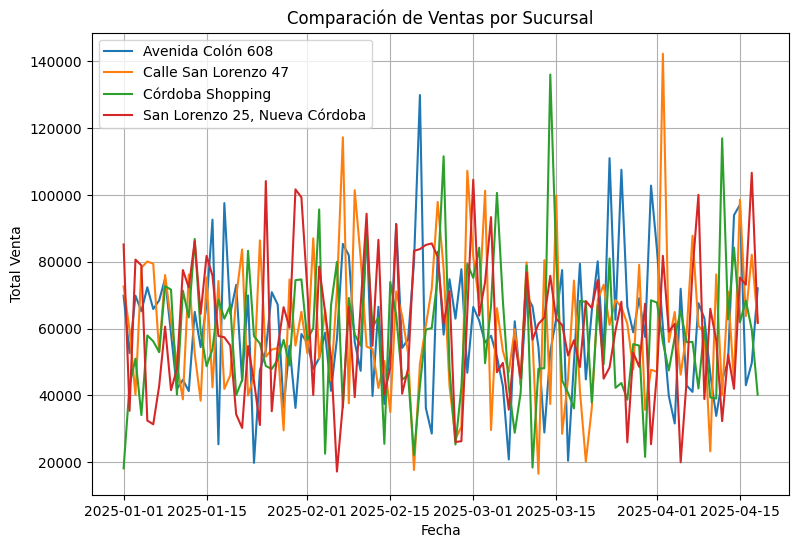

In [ ]:
plt.figure(figsize=(9,6))

for suc in ventas_sucursal["Sucursal"].unique():
    datos = ventas_sucursal[ventas_sucursal["Sucursal"] == suc]
    plt.plot(datos["Fecha"], datos["Total_Venta"], label=suc)

plt.title("Comparación de Ventas por Sucursal")
plt.xlabel("Fecha")
plt.ylabel("Total Venta")
plt.legend()
plt.grid()
plt.savefig("grafico5_sucursales.png")
plt.show()

Una sucursal domina claramente en ventas. Esto podría ser por mejor ubicación o mayor capacidad.